In [37]:
%load_ext autoreload
%autoreload 2

from msr.deeplearning.datasets import PtbXLDataset, MimicDataset, BaseDataset
from msr.deeplearning.datamodules import PtbXLDataModule
from msr.data.raw.ptbxl import FS
import matplotlib.pyplot as plt

TARGET = "diagnostic_class"
BASE_PARAMS = dict(fs=FS, target=TARGET)
SPLITS = ["train", "val", "test"]

def datasets_info(datasets):
    ncols = len(datasets)
    fig, axes = plt.subplots(1, ncols, figsize=(ncols * 5, 3.5))
    for dataset, ax in zip(datasets, axes):
        dataset.plot_classes_counts(ax=ax)
        ax.set_title(dataset.split)
    plt.tight_layout()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **`whole_signal_waveforms`**

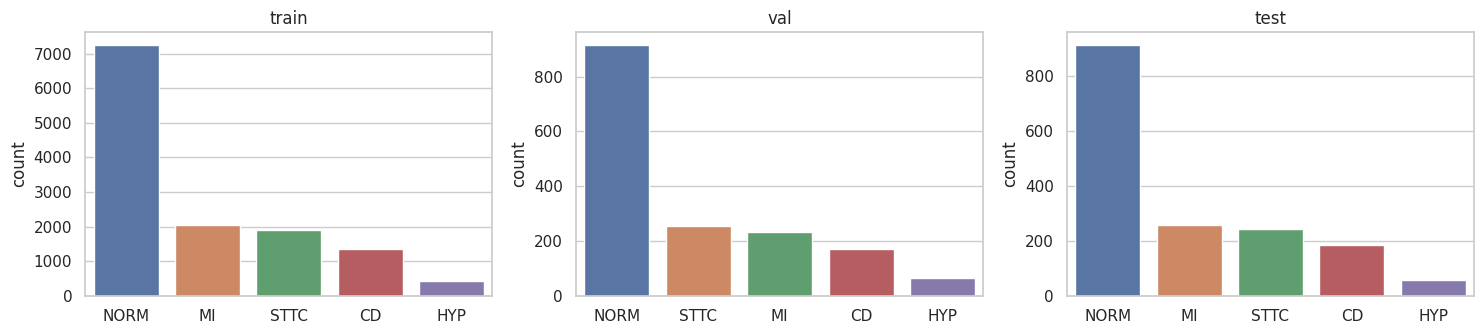

In [39]:
rep_type = "whole_signal_waveforms"
datasets = [PtbXLDataset(split, rep_type, **BASE_PARAMS) for split in SPLITS]
datasets_info(datasets)

In [9]:
val_ds = PtbXLDataset("val", "whole_signal_waveforms", **BASE_PARAMS)
val_ds

<class 'msr.deeplearning.datasets.PtbXLDataset'>
   representation_type = whole_signal_waveforms
   split = val
   data_shape = torch.Size([1642, 1000, 12])
   targets = [2 3 4 ... 2 3 3]
   info = {0: 'CD', 1: 'HYP', 2: 'MI', 3: 'NORM', 4: 'STTC'}
   classes_counts = {'CD': 172, 'HYP': 64, 'MI': 234, 'NORM': 916, 'STTC': 256}

In [10]:
test_ds = PtbXLDataset("test", "whole_signal_waveforms", **BASE_PARAMS)
test_ds

<class 'msr.deeplearning.datasets.PtbXLDataset'>
   representation_type = whole_signal_waveforms
   split = test
   data_shape = torch.Size([1652, 1000, 12])
   targets = [3 3 3 ... 3 0 2]
   info = {0: 'CD', 1: 'HYP', 2: 'MI', 3: 'NORM', 4: 'STTC'}
   classes_counts = {'CD': 184, 'HYP': 56, 'MI': 256, 'NORM': 913, 'STTC': 243}

In [83]:
import numpy as np

In [14]:
dataset.targets

array([3, 3, 3, ..., 3, 4, 3])

In [15]:
dataset.info

{0: 'CD', 1: 'HYP', 2: 'MI', 3: 'NORM', 4: 'STTC'}